In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [ ]:
co2_levels = pd.read_csv('ch2_co2_levels.csv')
co2_levels.set_index('datestamp', inplace=True)
co2_levels = co2_levels.fillna(method='bfill')

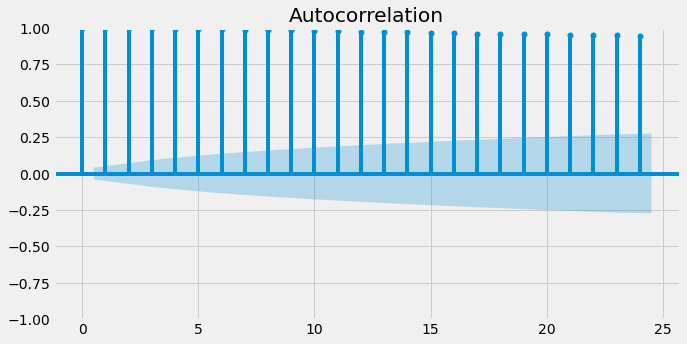

In [ ]:
from statsmodels.graphics import tsaplots

# Display 
fig = tsaplots.plot_acf(co2_levels['co2'], lags= 24);

In [ ]:
co2_levels.index = pd.to_datetime(co2_levels.index)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


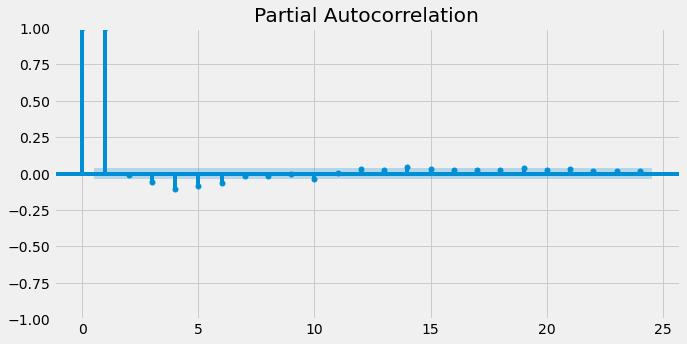

In [ ]:
# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24);

In [ ]:
import statsmodels.api as sm

# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

datestamp
1958-03-29    1.028042
1958-04-05    1.235242
1958-04-12    1.412344
1958-04-19    1.701186
1958-04-26    1.950694
                ...   
2001-12-01   -0.525044
2001-12-08   -0.392799
2001-12-15   -0.134838
2001-12-22    0.116056
2001-12-29    0.285354
Name: seasonal, Length: 2284, dtype: float64


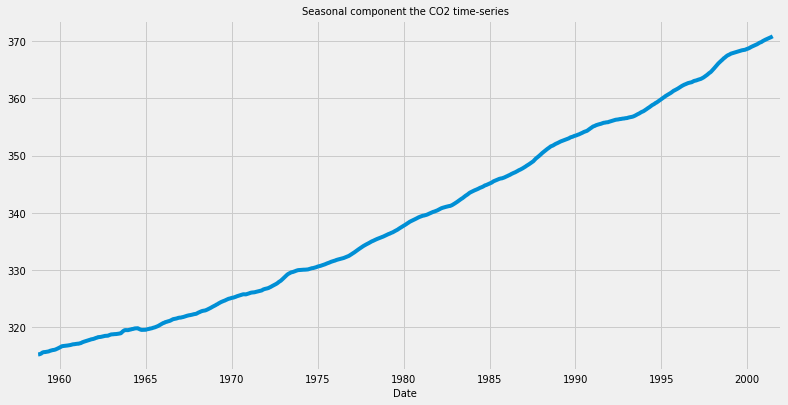

In [ ]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=10);

# Specify axis labels
ax.set_xlabel('Date', fontsize=10);
ax.set_title('Seasonal component the CO2 time-series', fontsize=10);

In [ ]:
airline = pd.read_csv('ch3_airline_passengers.csv', parse_dates=['Month'], index_col='Month')


In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AirPassengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


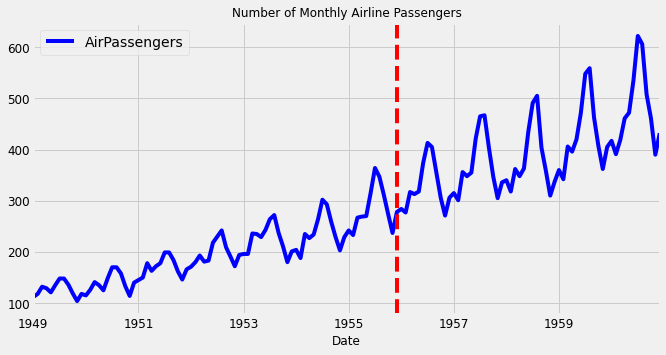

In [ ]:
# Plot the time series in your dataframe
ax = airline.plot(color='blue', fontsize=12);

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--');

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12);
ax.set_title('Number of Monthly Airline Passengers', fontsize=12);

In [ ]:
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


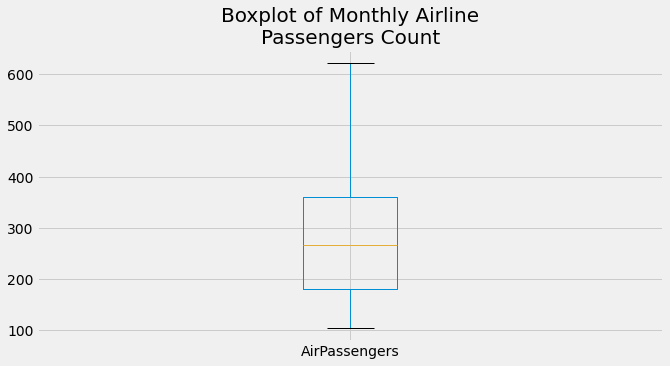

In [ ]:
# Display boxplot of airline values
ax = airline.boxplot();

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20);


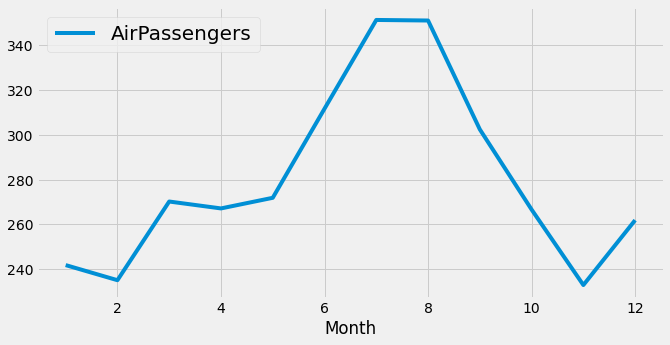

In [ ]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot();
plt.legend(fontsize=20);

In [ ]:
# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

In [ ]:
airline_decomposed = pd.concat([trend, seasonal], axis=1)

            trend   seasonal
Month                       
1949-01-01    NaN -24.748737
1949-02-01    NaN -36.188131
1949-03-01    NaN  -2.241162
1949-04-01    NaN  -8.036616
1949-05-01    NaN  -4.506313


FileNotFoundError: ignored

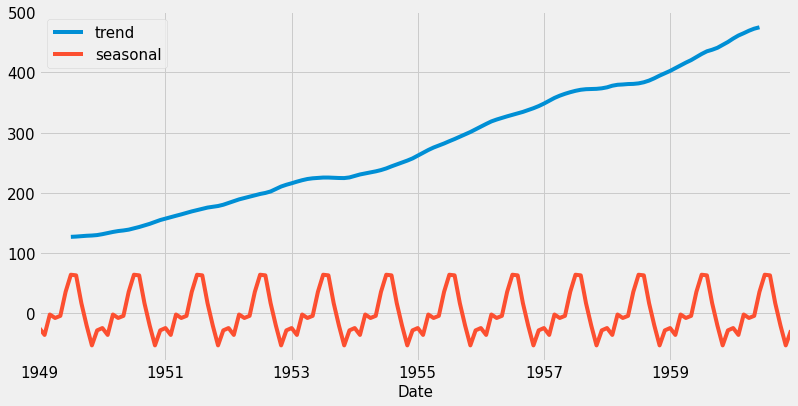

In [ ]:
# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head(5))

# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15);

# Specify axis labels
ax.set_xlabel('Date', fontsize=15);
plt.legend(fontsize=15);
plt.savefig('../images/trend_seasonal.png')